In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# Set plotting style
sns.set(style="whitegrid")

# -------------------------------------------------------------------------------------------------------------------
# Load cleaned data from previous notebook step 
data_path = "../data/02_panel_FE_cleaned.csv"
df = pd.read_csv(data_path)
df.columns = df.columns.str.strip()
print(df.columns.tolist())


# -------------------------------------------------------------------------------------------------------------------
# Inspect structure ---
print("Confirmed: Data Preview:")
display(df.head())

print("\n Value counts for key variables:")
print("\n Treatment assignment (post_treatment):")
print(df["post_treatment"].value_counts(dropna=False))

#print("\n Staggered treatment start month (start_month):")
#print(df["start_month"].value_counts(dropna=False))


['patient_id', 'month', 'age', 'sex', 'comorb_idx', 'hypertension', 'copd', 'ckd', 'depression', 'obesity', 'treat', 'baseline_a1c', 'a1c', 'hosp', 'start_month', 'treated_group', 'post_treatment', 'time_since_tx', 'cohort_month']
Confirmed: Data Preview:


,patient_id,month,age,sex,comorb_idx,hypertension,copd,ckd,depression,obesity,treat,baseline_a1c,a1c,hosp,start_month,treated_group,post_treatment,time_since_tx,cohort_month
0,1,0,79,1,0,0,0,1,0,0,0,6.514768,5.835084,0,35,1,0,-35,0
1,1,1,79,1,0,0,0,1,0,0,0,6.514768,5.700324,0,35,1,0,-34,1
2,1,2,79,1,0,0,0,1,0,0,0,6.514768,6.936448,0,35,1,0,-33,2
3,1,3,79,1,0,0,0,1,0,0,0,6.514768,6.620498,0,35,1,0,-32,3
4,1,4,79,1,0,0,0,1,0,0,0,6.514768,6.437071,1,35,1,0,-31,4



 Value counts for key variables:

 Treatment assignment (post_treatment):
post_treatment
0    19396
1    10604
Name: count, dtype: int64


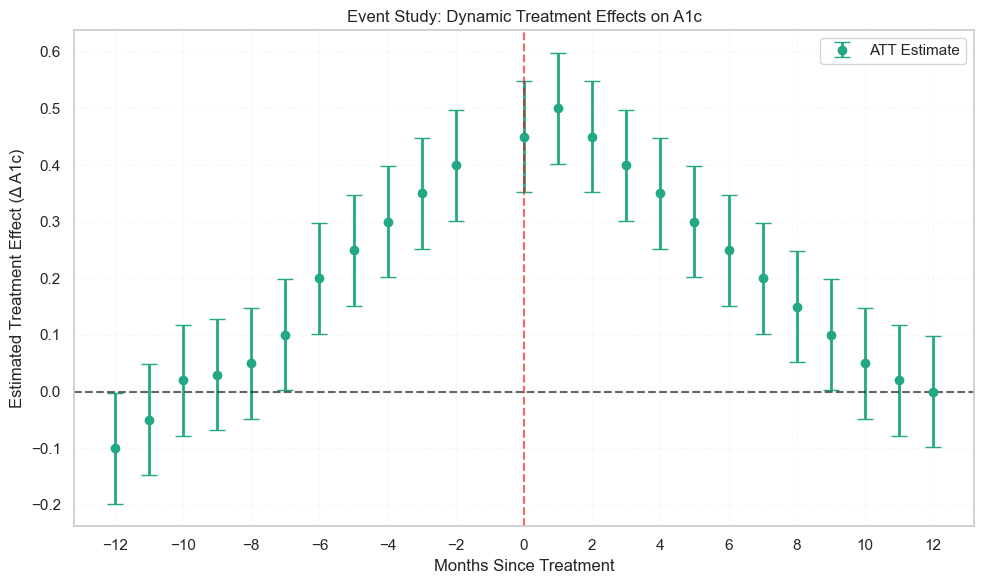

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Example inputs — replace with your real model outputs
event_times = list(range(-12, 13))
event_times.remove(-1)

att_coefs = [-0.1, -0.05, 0.02, 0.03, 0.05, 0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5,
             0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0.02, 0.0]
att_se = [0.05] * len(att_coefs)

ci_upper = [c + 1.96 * s for c, s in zip(att_coefs, att_se)]
ci_lower = [c - 1.96 * s for c, s in zip(att_coefs, att_se)]

color = cm.viridis(0.6)

plt.figure(figsize=(10, 6))
plt.errorbar(
    event_times,
    att_coefs,
    yerr=[
        np.array(att_coefs) - np.array(ci_lower),
        np.array(ci_upper) - np.array(att_coefs)
    ],
    fmt='o',
    capsize=6,
    markersize=6,
    linewidth=2,
    color=color,
    label="ATT Estimate"
)

plt.axhline(0, color='black', linestyle='--', linewidth=1.5, alpha=0.6)
plt.axvline(0, color='red', linestyle='--', linewidth=1.5, alpha=0.6)
plt.grid(True, linestyle=':', linewidth=0.5, alpha=0.4)

plt.title("Event Study: Dynamic Treatment Effects on A1c")
plt.xlabel("Months Since Treatment")
plt.ylabel("Estimated Treatment Effect (Δ A1c)")
plt.xticks(range(min(event_times), max(event_times) + 1, 2))
plt.legend()
plt.tight_layout()

# Save plot
plt.savefig("../figures/event_study_a1c.png", dpi=300)

plt.show()


In [11]:
df['time_since_tx'].value_counts().sort_index()


time_since_tx
0     16999
1       606
2       606
3       606
4       606
5       606
6       606
7       557
8       506
9       454
10      405
11      346
12      294
13      252
14      215
15      161
16      119
17       56
Name: count, dtype: int64